# WP12

## Theoretical Methods for Condensed Matter

### Tom Frömbgen

# Part II

# Theory of non-covalent interactions
---
## General Setup

In [7]:
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import pandas as pd
import lmfit as lf
from lmfit.models import ExpressionModel
from inspect import signature
#from scipy.optimize import curve_fit
#from scipy.optimize import differential_evolution as DE
import os
import sys
import argparse
from pathlib import Path
from IPython.display import display_html, display
from itertools import chain, cycle


save_as_pgf = 1
save_as_png = 0

if save_as_pgf == 1:
    mpl.use("pgf")
    mpl.rcParams['text.usetex'] = True
    mpl.rcParams['pgf.texsystem'] = 'pdflatex'
    mpl.rcParams['pgf.rcfonts'] = False
    mpl.rcParams['pgf.preamble'] = r'\usepackage{amssymb} \usepackage{amsmath}'
    mpl.rcParams['font.family'] = 'serif'
    mpl.rcParams['font.serif'] = 'Computer Modern'
    mpl.rc('axes', titlesize=10)     # fontsize of the axes title
    mpl.rc('axes', labelsize=10)     # fontsize of the x and y labels
    mpl.rc('xtick', labelsize=8)    # fontsize of the tick labels
    mpl.rc('ytick', labelsize=8)    # fontsize of the tick labels
    mpl.rc('legend', fontsize=8)
    mpl.rc('figure', titlesize=10)   # fontsize of the figure title

    lw = 1 # width of grid lines

    # width of tex document in inches
    fig_width = 6.69423
    fig_height = fig_width * 0.6
    import matplotlib.pyplot as plt
    
else:
    import matplotlib.pyplot as plt
    plt.rc('font', size=16)          # controls default text sizes
    plt.rc('axes', titlesize=16)     # fontsize of the axes title
    plt.rc('axes', labelsize=18)     # fontsize of the x and y labels
    plt.rc('xtick', labelsize=16)    # fontsize of the tick labels
    plt.rc('ytick', labelsize=16)    # fontsize of the tick labels
    plt.rc('legend', fontsize=18)    # legend fontsize
    plt.rc('figure', titlesize=18)   # fontsize of the figure title

    lw = 1

    # height and width for nice print in jupyter notebook
    fig_width = 20
    fig_height = 10
    


# number of decimals printed in numpy stuff
np.set_printoptions(formatter={'float': '{: 0.3f}'.format})

# uni bonn colors
blue = "#07529a"
yellow = "#ffb90c"

# number of decimals
ytick_format = mpl.ticker.FormatStrFormatter('%.2f')

/usr/lib64/python3.6/site-packages/matplotlib/__init__.py:1405: UserWarning: 
This call to matplotlib.use() has no effect because the backend has already
been chosen; matplotlib.use() must be called *before* pylab, matplotlib.pyplot,
or matplotlib.backends is imported for the first time.

  warnings.warn(_use_error_msg)


## Helpers

In [8]:
def save_plot_as_pgf(fig, path):
  if save_as_pgf == 1:
    fig.savefig(path, format="pgf")


def save_plot_as_png(fig, path):
  if save_as_png == 1:
    fig.savefig(path, format="png")


def checkForFaultyData(df):
  if df.isnull().sum().sum() != 0:
    df.dropna(how='any', inplace=True)
    print(df.isnull().sum())
    print("WARNING! Dropped some null values.")
  return df

def display_side_by_side(*args,titles=cycle([''])):
    html_str=''
    for df,title in zip(args, chain(titles,cycle(['</br>'])) ):
        html_str+='<th style="text-align:center"><td style="vertical-align:top">'
        html_str+=f'<h2>{title}</h2>'
        html_str+=df.to_html().replace('table','table style="display:inline"')
        html_str+='</td></th>'
    display_html(html_str,raw=True)
    
eh2kcal = 627.503 
ev2kcal = 23.0609
eh2kj = 2625.5 
ev2kj = 96.4869

# Main part

# 1. Partitioning non-covalent interactions
## a)

In [9]:
def getFileList():
  filelist = []
  for file in sorted(Path("./ex1/").rglob("*sapt/molpro.out")):
    filelist.append(file)

  if len(filelist) == 0:
    sys.exit("No '*data' files found.")

  return filelist
    
def main():
  data = []
  energy_pos = 4

  #print("Compiling file list...")
  flist = getFileList()
  #print("done\n\nReading out files...")

  for i, file in enumerate(flist):

    with open(file) as f:
      for line in f:
        if "E1pol       " in line:
          E1pol = line.split()[energy_pos]
        if "E1exch       " in line:
          E1exch = line.split()[energy_pos]
        if "E2ind       " in line:
          E2ind = line.split()[energy_pos]
        if "E2ind-exch       " in line:
          E2ind_exch = line.split()[energy_pos]
        if "E2disp       " in line:
          E2disp = line.split()[energy_pos]
        if "E2disp-exch       " in line:
          E2disp_exch = line.split()[energy_pos]
        if " E1tot       " in line:
          E1tot = line.split()[energy_pos]
        if " E2tot       " in line:
          E2tot = line.split()[energy_pos]
        if "E1tot+E2tot       " in line:
          E1tot_E2tot = line.split()[energy_pos]

    data.append([file.parent, E1pol, E1exch, E2ind, E2ind_exch, E2disp, E2disp_exch, E1tot, E2tot, E1tot_E2tot])
  
  cols = ["system", "E1pol", "E1exch", "E2ind", "E2ind-exch", "E2disp", "E2disp-exch", "E1tot", "E2tot", "E1tot+E2tot"]
  df = pd.DataFrame(columns=cols, data=data)
  df = df.sort_values(by="system")

  #print(df.to_string(index=False))


  # save to csv
  save_loc = os.path.join(os.path.realpath("."), "ex1/binding_energies.csv")
  df.to_csv(save_loc, index=False)
  #print("\nSaved data to {}.".format(save_loc))

main()

energies = pd.read_csv("ex1/binding_energies.csv", delimiter=",")
display(energies)

,system,E1pol,E1exch,E2ind,E2ind-exch,E2disp,E2disp-exch,E1tot,E2tot,E1tot+E2tot
0,ex1/ar2/hf-sapt,-0.1195,0.4005,-0.1469,0.1442,-0.5018,0.0355,0.2811,-0.4692,-0.1881
1,ex1/ar2/pbe0-sapt,-0.1249,0.4120,-0.1544,0.1513,-0.5236,0.0382,0.2871,-0.4886,-0.2016
2,ex1/uracil2/hf-sapt,-26.8849,25.3701,-12.8279,6.2995,-8.7528,1.5528,-1.5147,-13.7284,-15.2431
3,ex1/uracil2/pbe0-sapt,-25.7862,29.4175,-15.6878,9.4262,-9.6500,1.9399,3.6314,-13.9717,-10.3403
4,ex1/water2/hf-sapt,-7.3830,5.4955,-2.3656,1.2402,-2.2502,0.3952,-1.8875,-2.9804,-4.8679
5,ex1/water2/pbe0-sapt,-7.0930,6.3003,-2.7487,1.6166,-2.4950,0.4730,-0.7927,-3.1542,-3.9469


## b) Potential energy surface of the Ar-dimer

### Get energies

In [10]:
def getFileList():
  filelist = []
  for file in sorted(Path("./ex1/ar2/pes").rglob("molpro.out")):
    filelist.append(file)

  if len(filelist) == 0:
    sys.exit("No '*data' files found.")

  return filelist

def progress(count, total, status=''):
  bar_len = 60
  filled_len = int(round(bar_len * count / float(total)))

  percents = round(100.0 * count / float(total), 1)
  bar = '=' * filled_len + '-' * (bar_len - filled_len)

  sys.stdout.write('[%s] %s%s %s\r' % (bar, percents, '%', status))
  sys.stdout.flush()
    
def main():
  data = []
  energy_pos = 4

  #print("Compiling file list...")
  flist = getFileList()
  #print("done\n\nReading out files...")

  for i, file in enumerate(flist):
    #dist = float(file.parent)

    with open(file) as f:
      for line in f:
        if "E1pol       " in line:
          E1pol = line.split()[energy_pos]
        if "E1exch       " in line:
          E1exch = line.split()[energy_pos]
        if "E2ind       " in line:
          E2ind = line.split()[energy_pos]
        if "E2ind-exch       " in line:
          E2ind_exch = line.split()[energy_pos]
        if "E2disp       " in line:
          E2disp = line.split()[energy_pos]
        if "E2disp-exch       " in line:
          E2disp_exch = line.split()[energy_pos]
        if " E1tot       " in line:
          E1tot = line.split()[energy_pos]
        if " E2tot       " in line:
          E2tot = line.split()[energy_pos]
        if "E1tot+E2tot       " in line:
          E1tot_E2tot = line.split()[energy_pos]

    data.append([file.parent.name, E1pol, E1exch, E2ind, E2ind_exch, E2disp, E2disp_exch, E1tot, E2tot, E1tot_E2tot])

    # print progress
    #progress(i, len(flist))

  
  cols = ["dist", "E1pol", "E1exch", "E2ind", "E2ind-exch", "E2disp", "E2disp-exch", "E1tot", "E2tot", "E1tot+E2tot"]
  df = pd.DataFrame(columns=cols, data=data)
  df = df.sort_values(by="dist")

  #print(df.to_string(index=False))


  # save to csv
  save_loc = os.path.join(os.path.realpath("."), "ex1/ar2/pes/scan_result.csv")
  df.to_csv(save_loc, index=False)
  print("\nSaved data to {}.".format(save_loc))

main()


Saved data to /home/froembgen/MSc/WP12/2_grimme/ex1/ar2/pes/scan_result.csv.


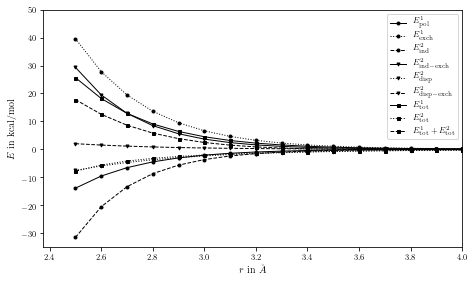

In [44]:
data = pd.read_csv("ex1/ar2/pes/scan_result.csv", delimiter=",")

names = ["E1pol", "E1exch", "E2ind", "E2ind-exch", "E2disp", "E2disp-exch", "E1tot", "E2tot", "E1tot+E2tot"]
labels = [r"$E^1_\mathrm{pol}$", r"$E^1_\mathrm{exch}$", r"$E^2_\mathrm{ind}$", r"$E^2_\mathrm{ind-exch}$", r"$E^2_\mathrm{disp}$", r"$E^2_\mathrm{disp-exch}$", r"$E^1_\mathrm{tot}$", r"$E^2_\mathrm{tot}$", r"$E^1_\mathrm{tot}+E^2_\mathrm{tot}$"]
markers = ["o","o","o","v","v","v","s","s","s"]
ls = ["-",":","--","-",":","--","-",":","--"]

num_hor_plots = 1
num_vert_plots = 1
fig, ax = plt.subplots(num_vert_plots, num_hor_plots, figsize=(fig_width, fig_height))

x = data["dist"]
for i, name in enumerate(names):
  y = data[name]

  ax.plot(x, y, ls=ls[i], color="k", lw=lw, label=labels[i], marker=markers[i], markersize=3)
  ax.set_xlim(right=4)
  ax.set_ylim(-35,50)
  #ax[0].axhline(y=0, color="k", lw="0.3", ls="--")
  ax.set_ylabel(r"$E$ in kcal/mol")
  ax.set_xlabel(r"$r$ in $\AA$")
  ax.legend(loc="best", fancybox=True)

fig.tight_layout()
save_plot_as_pgf(fig, "protocol/Graphen/pes.pgf")
plt.show()

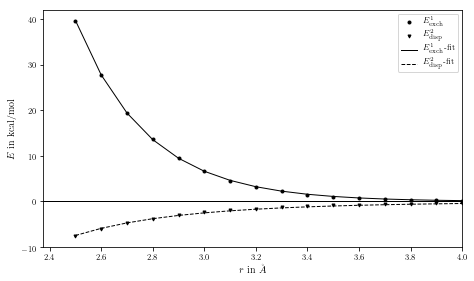

In [46]:
data = pd.read_csv("ex1/ar2/pes/scan_result.csv", delimiter=",")

x = data["dist"]
y1 = data["E1exch"]
y2 = data["E2disp"]
e1exch = ExpressionModel("a * exp(-b * x)")
fit1 = e1exch.fit(y1, x=x, a=1, b=1)
e2disp = ExpressionModel("a * x ** -6")
fit2 = e2disp.fit(y2, x=x, a=1)
#result = gmod.fit(y, x=x, amp=5, cen=5, wid=1)

num_hor_plots = 1
num_vert_plots = 1
fig, ax = plt.subplots(num_vert_plots, num_hor_plots, figsize=(fig_width, fig_height))

ax.plot(x, y1, ls="" , color="k", lw=lw, label=r"$E^1_\mathrm{exch}$", marker="o", markersize=3)
ax.plot(x, y2, ls="" , color="k", lw=lw, label=r"$E^2_\mathrm{disp}$", marker="v", markersize=3)
ax.plot(x, fit1.best_fit, ls="-", color="k", lw=lw, label=r"$E^1_\mathrm{exch}$-fit")
ax.plot(x, fit2.best_fit, ls="--", color="k", lw=lw, label=r"$E^2_\mathrm{disp}$-fit")
ax.set_xlim(right=4)
#ax.set_ylim(-1,1)
ax.axhline(y=0, color="k", lw="1", ls="-")
ax.set_ylabel(r"$E$ in kcal/mol")
ax.set_xlabel(r"$r$ in $\AA$")
ax.legend(loc="best", fancybox=True)

fig.tight_layout()
save_plot_as_pgf(fig, "protocol/Graphen/fit.pgf")
plt.show()

# 2. Supermolecular approaches

## Get energies and put them to .csv

### Ar2

In [13]:
def getFileListCC():
  filelistCC = []
  for file in sorted(Path("./ex2/ar2/monomer").rglob("ccsdf12.out")):
    filelistCC.append(file)

  if len(filelistCC) == 0:
    sys.exit("No '*data' files found.")
  return filelistCC

def getFileListMP2():
  filelistMP2 = []
  for file in sorted(Path("./ex2/ar2/monomer").rglob("ricc2.out")):
    filelistMP2.append(file)
    filelistMP2.reverse()
    
  if len(filelistMP2) == 0:
    sys.exit("No '*data' files found.")
  return filelistMP2

def main():
  data = []
  flist_mp2 = getFileListMP2()
  for i, file in enumerate(flist_mp2):

    with open(file) as f:
      for line in f:
        if line.startswith("     *   RHF  energy                             :"):
          Erhf = line.split()[4]
        if line.startswith("     *   MP2 correlation energy                  :"):
          Ecorr = line.split()[5]
        if line.startswith("     *   Final MP2 energy                        :"):
          Etot = line.split()[5]


    data.append([file.parent.name, Erhf, Ecorr, Etot])
  
  flist_cc = getFileListCC()
  for i, file in enumerate(flist_cc):

    with open(file) as f:
      for line in f:
        if line.startswith("      *  RHF  energy                             :"):
          Erhf = line.split()[4]
        if line.startswith("      *  total correlation energy                :"):
          Ecorr = line.split()[5]
        if line.startswith("      *  Final CCSD(T) energy                    :"):
          Etot = line.split()[5]
        
    data.append([file.parent.name, Erhf, Ecorr, Etot])
  
  cols = ["method", "Erhf", "Ecorr", "Etot"]
  df = pd.DataFrame(columns=cols, data=data)
  #df = df.sort_values(by="level")
  #print(df.to_string(index=False))

  # save to csv
  save_loc = os.path.join(os.path.realpath("."), "ex2/ar2/monomer-energies.csv")
  df.to_csv(save_loc, index=False)
  #print("\nSaved data to {}.".format(save_loc))

main()

In [14]:
def getFileListCC():
  filelistCC = []
  for file in sorted(Path("./ex2/ar2/dimer").rglob("ccsdf12.out")):
    filelistCC.append(file)

  if len(filelistCC) == 0:
    sys.exit("No '*data' files found.")
  return filelistCC

def getFileListMP2():
  filelistMP2 = []
  for file in sorted(Path("./ex2/ar2/dimer").rglob("ricc2.out")):
    filelistMP2.append(file)
    filelistMP2.reverse()
    
  if len(filelistMP2) == 0:
    sys.exit("No '*data' files found.")
  return filelistMP2

def main():
  data = []
  flist_mp2 = getFileListMP2()
  for i, file in enumerate(flist_mp2):

    with open(file) as f:
      for line in f:
        if line.startswith("     *   RHF  energy                             :"):
          Erhf = line.split()[4]
        if line.startswith("     *   MP2 correlation energy                  :"):
          Ecorr = line.split()[5]
        if line.startswith("     *   Final MP2 energy                        :"):
          Etot = line.split()[5]


    data.append([file.parent.name, Erhf, Ecorr, Etot])
  
  flist_cc = getFileListCC()
  for i, file in enumerate(flist_cc):

    with open(file) as f:
      for line in f:
        if line.startswith("      *  RHF  energy                             :"):
          Erhf = line.split()[4]
        if line.startswith("      *  total correlation energy                :"):
          Ecorr = line.split()[5]
        if line.startswith("      *  Final CCSD(T) energy                    :"):
          Etot = line.split()[5]
        
    data.append([file.parent.name, Erhf, Ecorr, Etot])
  
  cols = ["method", "Erhf", "Ecorr", "Etot"]
  df = pd.DataFrame(columns=cols, data=data)
  #df = df.sort_values(by="level")
  #print(df.to_string(index=False))

  # save to csv
  save_loc = os.path.join(os.path.realpath("."), "ex2/ar2/dimer-energies.csv")
  df.to_csv(save_loc, index=False)
  #print("\nSaved data to {}.".format(save_loc))

main()

### Water2

In [15]:
def getFileListCC():
  filelistCC = []
  for file in sorted(Path("./ex2/water2/monomer").rglob("ccsdf12.out")):
    filelistCC.append(file)

  if len(filelistCC) == 0:
    sys.exit("No '*data' files found.")
  return filelistCC

def getFileListMP2():
  filelistMP2 = []
  for file in sorted(Path("./ex2/water2/monomer").rglob("ricc2.out")):
    filelistMP2.append(file)
    filelistMP2.reverse()
    
  if len(filelistMP2) == 0:
    sys.exit("No '*data' files found.")
  return filelistMP2

def main():
  data = []
  flist_mp2 = getFileListMP2()
  for i, file in enumerate(flist_mp2):

    with open(file) as f:
      for line in f:
        if line.startswith("     *   RHF  energy                             :"):
          Erhf = line.split()[4]
        if line.startswith("     *   MP2 correlation energy                  :"):
          Ecorr = line.split()[5]
        if line.startswith("     *   Final MP2 energy                        :"):
          Etot = line.split()[5]


    data.append([file.parent.name, Erhf, Ecorr, Etot])
  
  flist_cc = getFileListCC()
  for i, file in enumerate(flist_cc):

    with open(file) as f:
      for line in f:
        if line.startswith("      *  RHF  energy                             :"):
          Erhf = line.split()[4]
        if line.startswith("      *  total correlation energy                :"):
          Ecorr = line.split()[5]
        if line.startswith("      *  Final CCSD(T) energy                    :"):
          Etot = line.split()[5]
        
    data.append([file.parent.name, Erhf, Ecorr, Etot])
  
  cols = ["method", "Erhf", "Ecorr", "Etot"]
  df = pd.DataFrame(columns=cols, data=data)
  #df = df.sort_values(by="level")
  #print(df.to_string(index=False))

  # save to csv
  save_loc = os.path.join(os.path.realpath("."), "ex2/water2/monomer-energies.csv")
  df.to_csv(save_loc, index=False)
  #print("\nSaved data to {}.".format(save_loc))

main()

In [16]:
def getFileListCC():
  filelistCC = []
  for file in sorted(Path("./ex2/water2/dimer").rglob("ccsdf12.out")):
    filelistCC.append(file)

  if len(filelistCC) == 0:
    sys.exit("No '*data' files found.")
  return filelistCC

def getFileListMP2():
  filelistMP2 = []
  for file in sorted(Path("./ex2/water2/dimer").rglob("ricc2.out")):
    filelistMP2.append(file)
    filelistMP2.reverse()
    
  if len(filelistMP2) == 0:
    sys.exit("No '*data' files found.")
  return filelistMP2

def main():
  data = []
  flist_mp2 = getFileListMP2()
  for i, file in enumerate(flist_mp2):

    with open(file) as f:
      for line in f:
        if line.startswith("     *   RHF  energy                             :"):
          Erhf = line.split()[4]
        if line.startswith("     *   MP2 correlation energy                  :"):
          Ecorr = line.split()[5]
        if line.startswith("     *   Final MP2 energy                        :"):
          Etot = line.split()[5]


    data.append([file.parent.name, Erhf, Ecorr, Etot])
  
  flist_cc = getFileListCC()
  for i, file in enumerate(flist_cc):

    with open(file) as f:
      for line in f:
        if line.startswith("      *  RHF  energy                             :"):
          Erhf = line.split()[4]
        if line.startswith("      *  total correlation energy                :"):
          Ecorr = line.split()[5]
        if line.startswith("      *  Final CCSD(T) energy                    :"):
          Etot = line.split()[5]
        
    data.append([file.parent.name, Erhf, Ecorr, Etot])
  
  cols = ["method", "Erhf", "Ecorr", "Etot"]
  df = pd.DataFrame(columns=cols, data=data)
  #df = df.sort_values(by="level")
  #print(df.to_string(index=False))

  # save to csv
  save_loc = os.path.join(os.path.realpath("."), "ex2/water2/dimer-energies.csv")
  df.to_csv(save_loc, index=False)
  #print("\nSaved data to {}.".format(save_loc))

main()

## Results: Ar2

In [17]:
mono = pd.read_csv("ex2/ar2/monomer-energies.csv")
dimer = pd.read_csv("ex2/ar2/dimer-energies.csv")

print("\n Monomer                                    Dimer")
display_side_by_side(mono, dimer)


 Monomer                                    Dimer


,method,Erhf,Ecorr,Etot
0,mp2-tz,-526.813355,-0.210921,-527.024277
1,mp2-qz,-526.816807,-0.232142,-527.048949
2,ccsdt-tz,-526.813355,-0.235403,-527.048758
,method,Erhf,Ecorr,Etot
0,mp2-tz,-1053.626321,-0.422740,-1054.049060
1,mp2-qz,-1053.633198,-0.465215,-1054.098413
2,ccsdt-tz,-1053.626321,-0.471625,-1054.097946


## Basis set extrapolation

In [48]:
a = 5.79
b = 3.05
t = 3.0
q = 4.0

ehf_cbs_mono = ((np.exp(a * t) * mono["Erhf"][0]) - (np.exp(a * q) * mono["Erhf"][1])) / ((np.exp(a * t) - np.exp(a * q)))
emp2_cbs_mono = ((t ** 3) * mono["Ecorr"][0] - (q ** 3) * mono["Ecorr"][1]) / ((t ** 3) - (q ** 3)) 
ecc_cbs_mono = emp2_cbs_mono + mono["Ecorr"][2] - mono["Ecorr"][0]

ehf_cbs_dimer = ((np.exp(a * t) * dimer["Erhf"][0]) - (np.exp(a * q) * dimer["Erhf"][1])) / ((np.exp(a * t) - np.exp(a * q)))
emp2_cbs_dimer = ((t ** 3) * dimer["Ecorr"][0] - (q ** 3) * dimer["Ecorr"][1]) / ((t ** 3) - (q ** 3))
ecc_cbs_dimer = emp2_cbs_dimer + dimer["Ecorr"][2] - dimer["Ecorr"][0]

energies_mono = ["monomer",ehf_cbs_mono, emp2_cbs_mono, ecc_cbs_mono]
energies_dimer = ["dimer",ehf_cbs_dimer, emp2_cbs_dimer, ecc_cbs_dimer]
data = [energies_mono, energies_dimer]
cols = ["CBS energies","Ehf", "Emp2", "Eccsd(t)"]
df = pd.DataFrame(columns=cols, data=data)
display(df)

e_ccsdt_cbs = ((ehf_cbs_dimer + ecc_cbs_dimer) - 2 * (ehf_cbs_mono + ecc_cbs_mono)) * eh2kcal
e_hf_cbs = (ehf_cbs_dimer - 2 * ehf_cbs_mono) * eh2kcal
e_sapt = -0.2016
e_exp = -0.2849#  to be evaluated

ener = [[e_hf_cbs, e_ccsdt_cbs, e_sapt, e_exp]]
cols = ["HF/CBS", "CCSD(T)/CBS", "AC-PBE0-SAPT0", "Experiment"]
comp = pd.DataFrame(columns=cols, data=ener)
print("\nBinding energies in kcal/mol")
display(comp)

,CBS energies,Ehf,Emp2,Eccsd(t)
0,monomer,-76.066105,-0.298796,-0.312158
1,dimer,-152.137698,-0.599964,-0.626744



Binding energies in kcal/mol


,HF/CBS,CCSD(T)/CBS,AC-PBE0-SAPT0,Experiment
0,-3.44369,-4.967117,-0.2016,-0.2849


## Results: Water2

In [19]:
mono = pd.read_csv("ex2/water2/monomer-energies.csv")
dimer = pd.read_csv("ex2/water2/dimer-energies.csv")

print("\n Monomer                                    Dimer")
display_side_by_side(mono, dimer)


 Monomer                                    Dimer


,method,Erhf,Ecorr,Etot
0,mp2-tz,-76.060707,-0.268399,-76.329106
1,mp2-qz,-76.066089,-0.285972,-76.352061
2,ccsdt-tz,-76.060707,-0.281761,-76.342468
,method,Erhf,Ecorr,Etot
0,mp2-tz,-152.126933,-0.539404,-152.666337
1,mp2-qz,-152.137665,-0.574415,-152.712080
2,ccsdt-tz,-152.126933,-0.566184,-152.693117


## Basis set extrapolation

In [47]:
a = 5.79
b = 3.05
t = 3.0
q = 4.0

ehf_cbs_mono = ((np.exp(a * t) * mono["Erhf"][0]) - (np.exp(a * q) * mono["Erhf"][1])) / ((np.exp(a * t) - np.exp(a * q)))
emp2_cbs_mono = ((t ** 3) * mono["Ecorr"][0] - (q ** 3) * mono["Ecorr"][1]) / ((t ** 3) - (q ** 3)) 
ecc_cbs_mono = emp2_cbs_mono + mono["Ecorr"][2] - mono["Ecorr"][0]

ehf_cbs_dimer = ((np.exp(a * t) * dimer["Erhf"][0]) - (np.exp(a * q) * dimer["Erhf"][1])) / ((np.exp(a * t) - np.exp(a * q)))
emp2_cbs_dimer = ((t ** 3) * dimer["Ecorr"][0] - (q ** 3) * dimer["Ecorr"][1]) / ((t ** 3) - (q ** 3))
ecc_cbs_dimer = emp2_cbs_dimer + dimer["Ecorr"][2] - dimer["Ecorr"][0]

energies_mono = ["monomer",ehf_cbs_mono, emp2_cbs_mono, ecc_cbs_mono]
energies_dimer = ["dimer",ehf_cbs_dimer, emp2_cbs_dimer, ecc_cbs_dimer]
data = [energies_mono, energies_dimer]
cols = ["CBS energies","Ehf", "Emp2", "Eccsd(t)"]
df = pd.DataFrame(columns=cols, data=data)
display(df)

e_ccsdt_cbs = ((ehf_cbs_dimer + ecc_cbs_dimer) - 2 * (ehf_cbs_mono + ecc_cbs_mono)) * eh2kcal
e_hf_cbs = (ehf_cbs_dimer - 2 * ehf_cbs_mono) * eh2kcal
e_sapt = -3.9469
e_exp = -4.94 #  to be evaluated

ener = [[e_hf_cbs, e_ccsdt_cbs, e_sapt, e_exp]]
cols = ["HF/CBS", "CCSD(T)/CBS", "AC-PBE0-SAPT0", "Experiment"]
comp = pd.DataFrame(columns=cols, data=ener)
print("\nBinding energies in kcal/mol")
display(comp)

,CBS energies,Ehf,Emp2,Eccsd(t)
0,monomer,-76.066105,-0.298796,-0.312158
1,dimer,-152.137698,-0.599964,-0.626744



Binding energies in kcal/mol


,HF/CBS,CCSD(T)/CBS,AC-PBE0-SAPT0,Experiment
0,-3.44369,-4.967117,-3.9469,-4.94


# 3. Molecules in solution

In [41]:
def main():
    data = []
    host = ["ex3/host/ridft.out", "ex3/host/dftd3.out", "ex3/host/gcp.out", "ex3/host/xtb/xtb.out", "ex3/host/COSMO/.GSOLV"]
    guest = ["ex3/guest/ridft.out", "ex3/guest/dftd3.out", "ex3/guest/gcp.out", "ex3/guest/xtb/xtb.out", "ex3/guest/COSMO/.GSOLV"]
    compl = ["ex3/complex/ridft.out", "ex3/complex/dftd3.out", "ex3/complex/gcp.out", "ex3/complex/xtb/xtb.out", "ex3/complex/COSMO/.GSOLV"]
    test = [host, guest, compl]  
    names = ["host", "guest", "complex"]  
    for i, element in enumerate(test):
        with open(element[0]) as f:
            for line in f:
                if line.startswith("                 |  total energy      ="):
                    Etot = line.split()[4]
        with open(element[1]) as f:
            for line in f:
                if line.startswith(" Edisp /kcal,au:"):
                    Edisp = line.split()[3]
        with open(element[2]) as f:
            for line in f:
                if line.startswith("  Egcp:"):
                    Egcp = line.split()[1]
        with open(element[3]) as f:
            for line in f:
                if line.startswith("         :: G(RRHO) contrib."):
                    grrho = line.split()[3]
        with open(element[4]) as f:
            for line in f:
                gsolv = line.split()[0]
        
        data.append([names[i], Etot, Edisp, Egcp, grrho, gsolv])
  
    cols = ["System", "Etot", "Edisp", "Egcp","G(RRHO)", "Gsolv"]
    df = pd.DataFrame(columns=cols, data=data)

    # save to csv
    save_loc = os.path.join(os.path.realpath("."), "ex3/electronic-contributions.csv")
    df.to_csv(save_loc, index=False)
    #print("\nSaved data to {}.".format(save_loc))
    #display(df)
    
    df = pd.read_csv("ex3/electronic-contributions.csv")
    summen = [Etot, Edisp, Egcp, grrho, gsolv]
    colos = ["Etot", "Edisp", "Egcp","G(RRHO)", "Gsolv"]
    for i, col in enumerate(colos):
        summen[i]=((df[col][2]-(df[col][0]+df[col][1]))*eh2kcal)
        
    data.append(["Sum", summen[0], summen[1], summen[2], summen[3], summen[4]])
    df = pd.DataFrame(columns=cols, data=data)
    save_loc = os.path.join(os.path.realpath("."), "ex3/electronic-contributions.csv")
    df.to_csv(save_loc, index=False)
    display(df)
    print(sum(summen))
main()

,System,Etot,Edisp,Egcp,G(RRHO),Gsolv
0,host,-1619.35587706778,-0.14597496,0.0379837685,0.526755920222,-.04504116370909
1,guest,-678.95076916487,-0.03550109,0.0076765894,0.082987590325,-.02399812295961
2,complex,-2298.29925946822,-0.23936628,0.0475080908,0.633090716165,-.04598341152370
3,Sum,4.63522,-36.3263,1.15946,14.6504,14.4676


-1.4135458295566696


# 4. Organic solids

In [96]:
def main():
    data = []
    gas = ["ex4/gas/tpssd3/OUTCAR", "ex4/gas/dftb3d3/freq3/crystal.out"]
    solid = ["ex4/solid/tpssd3/OUTCAR", "ex4/solid/dftb3d3/freq3/crystal.out"]
    test = [gas, solid]
    mol_phase = [1, 2]
    supercell = [1, 27]
    trans = [0.0, 0.296235]  
    names = ["gas", "solid"]  
    for i, element in enumerate(test):
        with open(element[0]) as f:
            for line in f:
                if line.startswith("  free  energy   TOTEN  =    "):
                    Etpss = float(line.split()[4]) / mol_phase[i] * ev2kcal
        with open(element[1]) as f:
            for line in f:
                if line.startswith(" EL            :"):
                    Edftb = float(line.split()[2]) / mol_phase[i] / supercell[i] * eh2kcal
        with open(element[1]) as f:
            for line in f:
                if line.startswith(" E0            :"):
                    ZPVE = float(line.split()[2]) / mol_phase[i] / supercell[i] * eh2kcal
        with open(element[1]) as f:
            for line in f:
                if line.startswith(" ET            :"):
                    Evib = float(line.split()[2]) / mol_phase[i] / supercell[i] * eh2kcal
        with open(element[1]) as f:
            for line in f:
                if line.startswith(" PV            :"):
                    pV = float(line.split()[2]) / mol_phase[i] / supercell[i] * eh2kcal
        Etrans = trans[i]
        Erot = trans[i]
        H = Edftb + ZPVE + Etrans + Erot + Evib + pV

        data.append([names[i], Etpss, Edftb, ZPVE, Etrans, Erot, Evib, pV, H])
  
    cols = ["Phase", "Etpss", "Edftb", "ZPVE", "Etrans", "Erot", "Evib", "pV", "H"]
    df = pd.DataFrame(columns=cols, data=data)
    #df = df.sort_values(by="level")
    #print(df.to_string(index=False))

    # save to csv
    save_loc = os.path.join(os.path.realpath("."), "ex4/energies.csv")
    df.to_csv(save_loc, index=False)
    display(df.round(2))
    print("Delta H =", (df["H"][1]-df["H"][0]).round(2), "kcal/mol")
main()

,Phase,Etpss,Edftb,ZPVE,Etrans,Erot,Evib,pV,H
0,gas,-1278.15,-7123.36,37.73,0.0,0.0,2.23,0.06,-7083.34
1,solid,-1293.40,-7150.34,38.81,0.3,0.3,3.29,0.00,-7107.65


Delta H = -24.31 kcal/mol
